In [1]:
__author__ = "Brian Huang"
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import bokeh
from bokeh.plotting import *
from bokeh.charts import *
from ggplot import *
import seaborn as sns
%matplotlib inline

In [2]:
output_notebook()

Loading BokehJS ...

# Data Processing

In [3]:
churn = pd.read_csv('./data/churn.csv')

In [4]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [5]:
#Convert the "no", "yes" values to booleans (True/False)
churn.replace('yes', 1, inplace = True)
churn.replace('no', 0, inplace = True)

#I replaced the values from False. to False and True. to True in our Label
churn.replace('False.', 0, inplace = True)
churn.replace('True.', 1, inplace = True)
#I renamed the Churn? column into Churn because it bothers me
churn.rename(columns={'Churn?':'Churned'}, inplace=True)

//anaconda/lib/python2.7/site-packages/pandas/core/common.py:491: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask = arr == x


In [6]:
churn.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churned
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [7]:
churn.columns

Index([u'State', u'Account Length', u'Area Code', u'Phone', u'Int'l Plan', u'VMail Plan', u'VMail Message', u'Day Mins', u'Day Calls', u'Day Charge', u'Eve Mins', u'Eve Calls', u'Eve Charge', u'Night Mins', u'Night Calls', u'Night Charge', u'Intl Mins', u'Intl Calls', u'Intl Charge', u'CustServ Calls', u'Churned'], dtype='object')

In [8]:
# reformat the column names
for name in churn.columns:
    # alt is a variable that replaced the extra spaces with _ and lowercase the word
    alt = name.replace(" ", "_").lower()
    # replaced the original column name with alt
    churn.rename(columns={name: alt}, inplace=True)

In [9]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state             3333 non-null object
account_length    3333 non-null int64
area_code         3333 non-null int64
phone             3333 non-null object
int'l_plan        3333 non-null int64
vmail_plan        3333 non-null int64
vmail_message     3333 non-null int64
day_mins          3333 non-null float64
day_calls         3333 non-null int64
day_charge        3333 non-null float64
eve_mins          3333 non-null float64
eve_calls         3333 non-null int64
eve_charge        3333 non-null float64
night_mins        3333 non-null float64
night_calls       3333 non-null int64
night_charge      3333 non-null float64
intl_mins         3333 non-null float64
intl_calls        3333 non-null int64
intl_charge       3333 non-null float64
custserv_calls    3333 non-null int64
churned           3333 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 572.9+ KB


# EDA

In [10]:
from bokeh.models import ColumnDataSource

//anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
//anaconda/lib/python2.7/site-packages/seaborn/linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


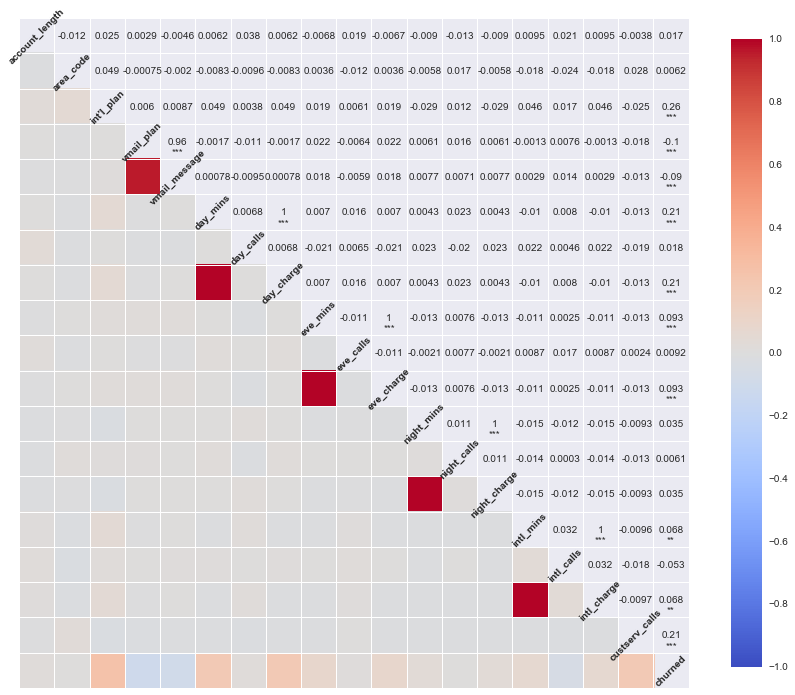

In [11]:
sns.plt.figure(figsize=(15,15))
sns.corrplot(data = churn, annot=True);

In [12]:
# creating CDS for bokeh
source = ColumnDataSource(churn)

In [15]:
TOOLS = "pan,wheel_zoom,box_zoom,reset,save,box_select"
p1 = figure(title = "minutes v. charges", tools = TOOLS)
p1.circle("day_mins", "day_charge", legend = "day", source = source)
p1.circle("eve_mins", "eve_charge", legend = "eve", color = "orange", source = source)
p1.circle("night_mins", "night_charge", legend = "night", color = "red", source= source)
p1.circle("intl_mins", "intl_charge", legend = "intl", color = "green", source= source)
show(p1);

with the above graph and the correlation matrix, we confirmed that the correlation between charges and minutes are 1. Therefore, we can drop one or the other.

In [16]:
churn_customer_call = Bar(data = churn, label = "churned", 
                          values = "custserv_calls", 
                          ylabel = "total customer service calls",
                          tools = 'hover', color = 'wheat');
show(churn_customer_call);

In this graph, we can see that people who churned has significantly lower customer service calls.

In [17]:
churned_by_state = Bar(churn, label = "state", values = "churned", 
                       agg = 'count', stack = "churned")
show(churned_by_state);

In [18]:
churn.head()

,state,account_length,area_code,phone,int'l_plan,vmail_plan,vmail_message,day_mins,day_calls,day_charge,...,eve_calls,eve_charge,night_mins,night_calls,night_charge,intl_mins,intl_calls,intl_charge,custserv_calls,churned
0,KS,128,415,382-4657,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,371-7191,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,358-1921,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,375-9999,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,330-6626,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [19]:
# remove columns that are not 
# important and gets in the way for modeling
churn.drop("state", axis = 1, inplace = True)
churn.drop("area_code", axis = 1, inplace = True)
churn.drop("phone", axis = 1, inplace = True)
churn.drop("day_mins", axis = 1, inplace = True)
churn.drop("eve_mins", axis = 1, inplace = True)
churn.drop("night_mins", axis = 1, inplace = True)
churn.drop("intl_mins", axis = 1, inplace = True)

# Machine Learning Modeling

In [20]:
# packages for feature selection and modeling
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report

In [21]:
# feautre columns
col_list = churn.columns.tolist()
del col_list[-1]

In [22]:
# split the data into features and labels
X = churn[col_list]
y = churn['churned']

In [23]:
X.head()

,account_length,int'l_plan,vmail_plan,vmail_message,day_calls,day_charge,eve_calls,eve_charge,night_calls,night_charge,intl_calls,intl_charge,custserv_calls
0,128,0,1,25,110,45.07,99,16.78,91,11.01,3,2.70,1
1,107,0,1,26,123,27.47,103,16.62,103,11.45,3,3.70,1
2,137,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29,0
3,84,1,0,0,71,50.90,88,5.26,89,8.86,7,1.78,2
4,75,1,0,0,113,28.34,122,12.61,121,8.41,3,2.73,3


In [24]:
# selecting 10 best features
selector = SelectKBest(chi2, k = 10)
X_new = selector.fit_transform(X, y)

In [25]:
# check the shape. Note that X_new now only has 10 features
X.shape, X_new.shape

((3333, 13), (3333, 10))

In [26]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(X_new,y)

In [27]:
# Random Forest
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
rf_pred = RFC.predict(x_test)

In [28]:
print "Random Forest: \n" + classification_report(y_test, rf_pred, target_names=['class 0', 'class 1'])

Random Forest: 
             precision    recall  f1-score   support

    class 0       0.94      0.99      0.97       710
    class 1       0.90      0.67      0.77       124

avg / total       0.94      0.94      0.94       834



In [29]:
# SVM: default setting
svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_test)

In [33]:
print "SVM: \n" + classification_report(y_test, svm_pred, target_names=['class 0', 'class 1'])

SVM: 
             precision    recall  f1-score   support

    class 0       0.85      1.00      0.92       710
    class 1       0.00      0.00      0.00       124

avg / total       0.72      0.85      0.78       834



In [31]:
# logistic regression
logistic = LogisticRegression()
logistic.fit(x_train, y_train)
log_pred = logistic.predict(x_test)

In [32]:
print "Logistic Regression: \n" + classification_report(y_test, log_pred, target_names=['class 0', 'class 1'])

Logistic Regression: 
             precision    recall  f1-score   support

    class 0       0.87      0.98      0.92       710
    class 1       0.53      0.14      0.22       124

avg / total       0.82      0.85      0.82       834

